# Question of Interest: What is the distribution of students by year in COMP 110?

In [101]:
%reload_ext autoreload
%autoreload 2

First, I will read in the csv and convert it to a column-oriented data table.

In [102]:
from data_utils import read_csv_rows, columnar

data_rows: list[dict[str, str]] = read_csv_rows('../../data/survey.csv')
columns: dict[str, list[str]] = columnar(data_rows)

Then, I will select just the year column and display the first ten rows.

In [103]:
from data_utils import head, select
subset: dict[str, list[str]] = select(columns, ["year"])
head(subset, 10)

{'year': ['23', '24', '23', '24', '22', '24', '22', '24', '24', '22']}

Next, I will use the max helper function to find the max value in the year section to determine who the youngest students in COMP 110 are. 

In [133]:
from utils import max

max: int = max(subset["year"])
print(f"The max value of the year section is: {max}")

The max value of the year section is: 25


The max function returned the value 25, which means that the youngest students in COMP 110 are freshmen.

Now, I will count up the totals of each year.

In [123]:
from data_utils import count
counts = count(subset['year'])

total_freshmen: int = counts['25']
print(f"Total Freshmen: {total_freshmen}")
total_sophomore: int = counts['24']
print(f"Total Sophomores: {total_sophomore}")
total_juniors: int = counts['23']
print(f"Total Juniors: {total_juniors}")
total_seniors: int = counts['22'] + counts['21']
print(f"Total Seniors: {total_seniors}")

Total Freshmen: 93
Total Sophomores: 282
Total Juniors: 114
Total Seniors: 84


Using the count function, I will count how many times each unique value in year appears. This is an alternative way of counting up the totals of each year.

In [119]:
from dictionaries import count

print(count(subset["year"]))

{'24': 282, '23': 113, '22': 74, '21': 10, '25': 93}


Using matplotlib, I will construct a bar graph of the distribution of students (by year) in this class.

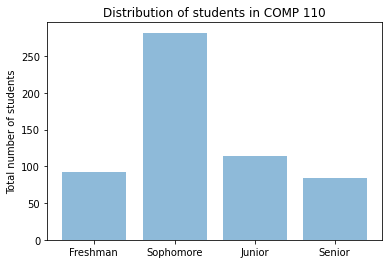

In [122]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

labels = ['Freshman ', 'Sophomore', 'Junior', 'Senior']
y_pos = [0, 1, 2, 3]  # the order the labels will be arranged in bar chart
performance = [total_freshmen, total_sophomore, total_juniors, total_seniors]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, labels)
plt.ylabel('Total number of students')
plt.title('Distribution of students in COMP 110')

plt.show()

Now, I will display the same data using a pie chart with what percentage of students fall into each year.

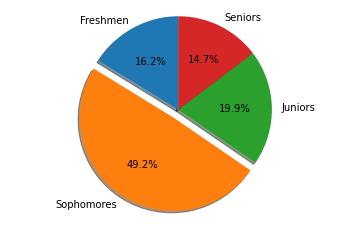

In [ ]:
labels = 'Freshmen', 'Sophomores', 'Juniors', 'Seniors'
sizes = [total_freshmen, total_sophomore, total_juniors, total_seniors]
explode = (0, 0.1, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

# Conclusion

In conclusion, the majority of students taking COMP 110 are sophomores. This may be because even though many students try to take COMP 110 in their first year, they are unable to enroll in it until their sophomore year. The next common is juniors, then freshmen. There are the least of seniors in this class. This finding makes sense as COMP 110 is an introductory level course and most students will have taken it by their senior year.